In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 코랩 사용시

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.getcwd()

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [ ]:
path = './drive/MyDrive/...'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
os.chdir(path)

In [ ]:
os.getcwd()

## 아파트 전월세 가격 회귀 모델

2020년 전국의 아파트 전월세 거래 데이터셋을 활용합니다.  
해당 데이터셋에서 전세 거래와 월세 거래를 구분한 후,  
보증금 혹은 월세에 가장 큰 영향을 미치는 feature를 찾아  
선형회귀 모델을 세우려고 합니다.

1) Apartment_train.csv, Apartment_test.csv 파일을  
apart_train, apart_test 라는 변수에 DataFrame 형태로 불러와주세요.

In [108]:
apart_train = pd.read_csv('C:/Users/endea/Desktop/data/Apartment_train.csv')
apart_test = pd.read_csv('C:/Users/endea/Desktop/data/Apartment_test.csv')

In [3]:
apart_train.head()

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,대구광역시,트윈팰리스,전세,84.1500,32000,0,13,2006
1,부산광역시,삼익비치,전세,73.9200,12000,0,8,1979
2,대구광역시,동대구반도유보라,월세,39.7596,1000,54,11,2018
3,대전광역시,주공1단지아파트,월세,26.3700,579,8,4,1993
4,광주광역시,선운지구진아리채,전세,78.0887,27000,0,1,2014


In [4]:
apart_test.head()

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,경기도,한빛마을6단지(휴먼시아)(1023),월세,45.8400,2806,19,15,2011
1,경기도,중앙하이츠1,전세,84.7900,31500,0,10,1993
2,대구광역시,달성화성파크드림,전세,59.9687,8000,0,9,2011
3,광주광역시,휴먼시아2,월세,46.5300,4526,7,4,2008
4,부산광역시,태진팰리스,전세,52.0100,18000,0,5,2018


2) apart 데이터셋에서 월세와 전세를 구분하여  
다음과 같은 4개의 변수에 할당하려고 합니다.  

- train set에서 월세_train, 전세_train  
 test set에서 월세_test, 전세_test  

이에 해당하는 코드를 작성해주세요.


In [109]:
c1 = (apart_train.전월세구분 == '월세')
c2 = (apart_train.전월세구분 == '전세')
c3 = (apart_test.전월세구분 == '월세')
c4 = (apart_test.전월세구분 == '전세')

In [110]:
월세_train = apart_train[c1]
전세_train = apart_train[c2]

월세_test = apart_test[c3]
전세_test = apart_test[c4]

In [28]:
전세_train.head()

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,대구광역시,트윈팰리스,전세,84.1500,32000,0,13,2006
1,부산광역시,삼익비치,전세,73.9200,12000,0,8,1979
4,광주광역시,선운지구진아리채,전세,78.0887,27000,0,1,2014
8,대전광역시,엑스포,전세,116.3700,28000,0,15,1994
9,충청남도,신세계,전세,83.5650,2200,0,5,1993


3) 이후 작업부터는 따로 언급이 없을 경우  
위에서 생성한 4개의 DataFrame 중  
train set만 이용하여 작업을 수행합니다.  

'월세'의 경우 월세 가격에,  
'전세'의 경우 보증금 가격에 
영향을 가장 많이 미치는 feature를 찾고자 합니다.  

다양한 방법을 동원해서,  
해당하는 feature를 '1개만' 찾아주세요.  

아마도 '월세'와 '전세' 두 경우에서 모두 같은 feature가 나올 것입니다.  

(hint: 상관계수행렬이나 산점도 이용)

In [13]:
import matplotlib.font_manager as fm

In [14]:
path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


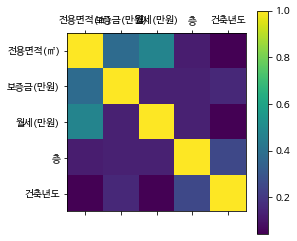

In [26]:
plt.matshow(월세_train.corr())

corr1 = 월세_train.corr()
plt.colorbar()
plt.xticks(range(len(corr1.columns)), corr1.columns)
plt.yticks(range(len(corr1.columns)), corr1.columns)

plt.show()

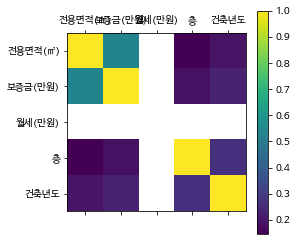

In [29]:
plt.matshow(전세_train.corr())

corr2 = 전세_train.corr()
plt.colorbar()
plt.xticks(range(len(corr2.columns)), corr2.columns)
plt.yticks(range(len(corr2.columns)), corr2.columns)

plt.show()

> 월세 및 보증금 가격은 둘 다 전용면적과 상관계수가 가장 높다

4) 위에서 찾은 feature를 이용해(이하 X라 칭함)  
'월세'의 경우 월세 가격(이하 y1),  
'전세'의 경우 보증금 가격(이하 y2)  
을 예측하는 모델을 세울 것입니다.

첫번째, 월세 가격을 예측하는 모델을 구축합니다.  
**파이프라인을 사용하지 않고** 작업합니다.  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
 StandardScaler를 사용합니다.(변수명은 scaler)  
- X와 y1의 관계를 나타내는 선형회귀 모델을 구축합니다.  
LinearRegression Estimator(변수명은 lin_reg_1)를 사용합니다.

In [30]:
# 관련 모듈 import
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [32]:
# input 데이터는 X_train, target 데이터는 y1_train 변수에 할당
X_train = 월세_train[['전용면적(㎡)']]
y1_train = 월세_train[['월세(만원)']]

In [34]:
# 데이터 scaling 하기
# X 데이터만 scailing 하며,
# 기존 X_train 변수에 덮어씌웁니다.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [36]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
lin_reg = LinearRegression()
lin_reg.fit(X_train, y1_train)

LinearRegression()

C:\Users\endea\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


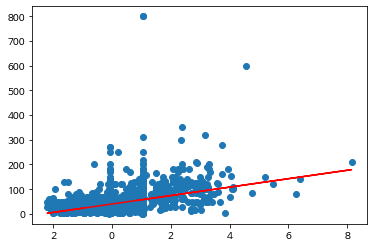

In [38]:
# # 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train)
plt.plot(X_train[:, 0], 
          lin_reg.predict(X_train), 
          c='r');

테스트셋, 즉 '월세_test'와  
이미 fitting된 모델을 이용해 predict를 수행합니다.  
y1_hat 이라는 변수에 '월세_test'를 predict한 값을 할당합니다.

In [39]:
# input 데이터는 X_test, target 데이터는 y1_test 변수에 할당
X_test = 월세_test[['전용면적(㎡)']]
y1_test = 월세_test[['월세(만원)']]

In [41]:
# X_test 역시 정규화 해주어야 합니다. 주의할점?
X_test = scaler.fit_transform(X_test)

In [44]:
X_test.shape

(1022, 1)

In [45]:
# y1_hat에 predict값 할당
y1_hat = lin_reg.predict(X_test)

C:\Users\endea\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


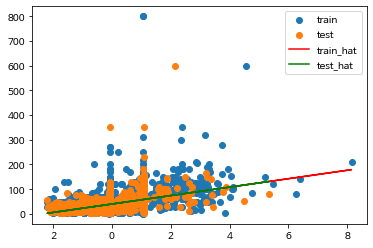

In [49]:
# # 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train, label='train')
plt.scatter(X_test[:, 0], y1_test, label='test')

plt.plot(X_train[:, 0], 
          lin_reg.predict(X_train), 
          c='r', label='train_hat')
plt.plot(X_test[:, 0], 
          y1_hat, 
          c='g', label='test_hat')

plt.legend();

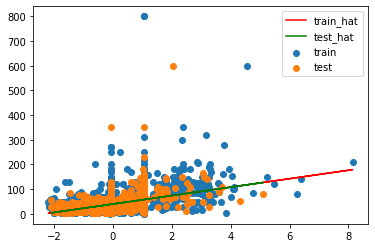

두번째, 전세 보증금 가격(y2) 예측 모델을 구축합니다.  
**파이프라인을 사용하여** 만듭니다. 
파이프라인 이름은 p1으로 정하고,  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
StandardScaler를 사용합니다.(변수명은 scaler)  

- 다항 특성을 만들 것입니다.  
PolynomialFeatrues 변환기를 사용하며,  
차수는 자유이고 bias는 없습니다.(변수명은 poly)  

- X와 y2의 관계를 나타내는 Ridge 모델을 구축합니다.  
Ridge Estimator를 사용하며, hyperparameter는 자유롭게 설정합니다.  
(변수명은 rdg_reg_1)

In [51]:
# 관련 모듈 import
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [111]:
# 파이프라인 생성
p1 = Pipeline([('scaler', StandardScaler()),
               ('poly', PolynomialFeatures(degree=5, include_bias=False)),
               ('rdg_reg_1', Ridge(alpha=0.5))])

In [112]:
# input 데이터는 X_train, target 데이터는 y2_train 변수에 할당
X_train = 전세_train[['전용면적(㎡)']]
y2_train = 전세_train[['보증금(만원)']]

In [113]:
# 파이프라인 fitting
p1.fit(X_train, y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('rdg_reg_1', Ridge(alpha=0.5))])

In [122]:
print(X_train.shape)
print(y2_train.shape)

(9068, 1)
(9068, 1)


In [132]:
y2_train1 = y2_train.to_numpy()

In [135]:
y2_train1 = y2_train1.reshape(9068,)

In [138]:
y2_train1.shape

(9068,)

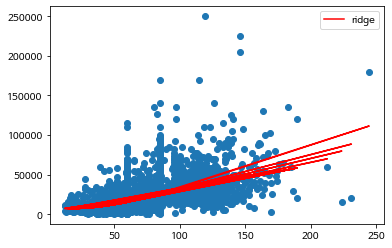

In [153]:
# # 시각화. 체크용입니다.
# # degree=5, alpha=0.5 적용하였을 경우
plt.scatter(X_train.iloc[:,0], y2_train)
plt.plot(X_train.iloc[:,0], 
          np.sort(p1.predict(X_train)), 
          c='r', label='ridge')
plt.legend();

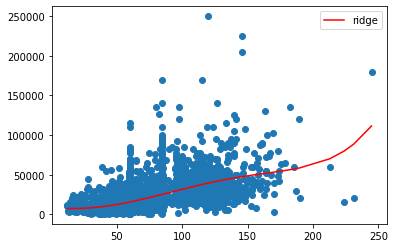

수고하셨습니다.